In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_csv('properatti.csv')
data_geo=gpd.read_file('barrios/barrios_badata_wgs84.shp')
pf = pd.DataFrame(data)
barrios_geo = data_geo

In [4]:

mask_capitalFederal = pf['state_name'] == 'Capital Federal'

dataset = pf[mask_capitalFederal]

dataset

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...


In [5]:
#Agrupamos por barrio
dataset_groupby_barrio = dataset.groupby('place_name')


In [6]:
#Definimos mascara lat para ver info
mask_lat = dataset['lat']
mask_lat

0        -34.661824
2        -34.652262
3        -34.647797
7        -34.559873
8        -34.559873
            ...    
121160   -34.563685
121209   -34.563685
121215          NaN
121217   -34.570639
121219          NaN
Name: lat, Length: 32316, dtype: float64

In [7]:
#Completamos los valores nulos de lat con el valor segun su barrio, usando transform y lambda.
lat_filled = dataset_groupby_barrio['lat'].transform(lambda grp: grp.fillna(grp.mean()))



In [10]:
#Agregamos la columna con los valores de lat completos. 
dataset.loc[:, ['lat_filled']] = lat_filled
lat_filled = dataset['lat_filled']

dataset

C:\Users\Equipo\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,lat_filled
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,-34.661824
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,-34.652262
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,-34.647797
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,-34.559873
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,-34.559873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,-34.563685
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,2611.464968,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,-34.563685
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,-34.563541
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,-34.570639


In [11]:
#Chequeando que coincidan los nuevos valores
data_cap_fed_2 = dataset['place_name'] == 'Capital Federal'
dataset[data_cap_fed_2]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,lat_filled
108,108,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,944.444444,1030.303030,NaN,NaN,NaN,http://www.properati.com.ar/15d29_venta_casa_b...,"Casa en 2 Plantas en BÂ° La Merced, a Metros d...","Casa 180m² con 2 Plantas en Navarro, Julián 29...",https://thumbs4.properati.com/4/0oBb4XqxRngzR8...,-34.626709
110,110,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,658.602151,1400.000000,NaN,NaN,NaN,http://www.properati.com.ar/15d2j_venta_casa_b...,"Lote: 744,76 m. (Frente: 17,32 x 43 de fondo) ...",Casa 744m² con 2 Plantas en Del Valle Iberluce...,https://thumbs4.properati.com/8/18ePTaTJyu0_Zz...,-34.626709
115,115,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,611.111111,1685.823755,NaN,NaN,NaN,http://www.properati.com.ar/15d2z_venta_casa_b...,PB. Liv y com con chimenea con salida a jardin...,"Casa 720m² con Plantas en Palma, Diego 1800, A...",https://thumbs4.properati.com/5/QFONCBUzvOiyBI...,-34.626709
119,119,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,1600.000000,1729.729730,NaN,NaN,NaN,http://www.properati.com.ar/15d3e_venta_casa_b...,MUY BUENA ZONA CON EXCELENTE ACCESO A PANAMERI...,"Casa 200m² con Cochera en Barbosa, Gerónimo 14...",https://thumbs4.properati.com/0/jWnclcGGdWkt5x...,-34.626709
121,121,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,1088.235294,1541.666667,NaN,NaN,NaN,http://www.properati.com.ar/15d3g_venta_casa_b...,"CHALET EN 2 PLANTAS, EXELENTE CONSTRUCCION.LIV...","Casa 340m² con Cochera en Palma, Diego 1300, A...",https://thumbs4.properati.com/0/BvJwEABky1kX09...,-34.626709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121098,121098,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,1914.893617,2647.058824,NaN,NaN,NaN,http://www.properati.com.ar/1cj37_venta_depart...,Departamento piso en Venta de 3 ambientes en P...,Departamento - P.Avellaneda,https://thumbs4.properati.com/6/kHuYkVmm0EZh4T...,-34.626709
121102,121102,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,1974.358974,2538.461538,NaN,NaN,NaN,http://www.properati.com.ar/1cj3e_venta_depart...,Departamento piso en Venta de 4 ambientes en P...,Departamento - P.Avellaneda,https://thumbs4.properati.com/5/RrX5U_2lrmBxIK...,-34.626709
121124,121124,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,140.000000,259.677419,NaN,NaN,NaN,http://www.properati.com.ar/1cj49_venta_depart...,Departamentos Semipisos en Venta de 3 ambiente...,Departamento - P.Avellaneda,https://thumbs4.properati.com/7/EqhGjiqTCy2bES...,-34.626709
121125,121125,sell,store,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,"-34.6370141711,-58.4331771353",-34.637014,...,521.091811,521.091811,NaN,NaN,11000.0,http://www.properati.com.ar/1cj4a_venta_local_...,NOTA: Las medidas expresadas son estimativas.,Casa - P.Chacabuco,https://thumbs4.properati.com/4/olJy9dylwq2xxL...,-34.637014


In [12]:
#Generamos mascara de lon para ver info
mask_lon = dataset['lon']
mask_lon

0        -58.508839
2        -58.522982
3        -58.516424
7        -58.443362
8        -58.443362
            ...    
121160   -58.442683
121209   -58.442683
121215          NaN
121217   -58.475596
121219          NaN
Name: lon, Length: 32316, dtype: float64

In [13]:
#Completamos los valores nulos de lon con el valor segun su barrio, usando transform y lambda.
lon_filled = dataset_groupby_barrio['lon'].transform(lambda grp: grp.fillna(grp.mean()))


In [14]:
#Agregamos la columna con los valores de lon completos. 
dataset.loc[:, ['lon_filled']] = lon_filled
lon_filled = dataset['lon_filled']

dataset

C:\Users\Equipo\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
C:\Users\Equipo\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,lat_filled,lon_filled
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,-34.661824,-58.508839
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,-34.652262,-58.522982
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,-34.647797,-58.516424
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,-34.559873,-58.443362
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,-34.559873,-58.443362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,-34.563685,-58.442683
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,NaN,NaN,6300.0,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,-34.563685,-58.442683
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,-34.563541,-58.453904
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,-34.570639,-58.475596


In [18]:
#Definiendo propiedades de geo
geometria = gpd.points_from_xy(dataset.lon_filled, dataset.lat_filled)
geo_prop = gpd.GeoDataFrame(dataset ,geometry=geometria)

In [19]:
geo_prop.loc[:4, ['geometry', 'lat_filled', 'lon_filled','property_type','place_name']]

,geometry,lat_filled,lon_filled,property_type,place_name
0,POINT (-58.50884 -34.66182),-34.661824,-58.508839,PH,Mataderos
2,POINT (-58.52298 -34.65226),-34.652262,-58.522982,apartment,Mataderos
3,POINT (-58.51642 -34.64780),-34.647797,-58.516424,PH,Liniers


In [20]:
geo_prop


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,lat_filled,lon_filled,geometry
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,-34.661824,-58.508839,POINT (-58.50884 -34.66182)
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,-34.652262,-58.522982,POINT (-58.52298 -34.65226)
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,-34.647797,-58.516424,POINT (-58.51642 -34.64780)
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,-34.559873,-58.443362,POINT (-58.44336 -34.55987)
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,-34.559873,-58.443362,POINT (-58.44336 -34.55987)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,NaN,6300.0,http://www.properati.com.ar/1cj5v_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,-34.563685,-58.442683,POINT (-58.44268 -34.56369)
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,NaN,NaN,6300.0,http://www.properati.com.ar/1cj7c_venta_depart...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,-34.563685,-58.442683,POINT (-58.44268 -34.56369)
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,-34.563541,-58.453904,POINT (-58.45390 -34.56354)
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,-34.570639,-58.475596,POINT (-58.47560 -34.57064)


In [35]:
#Ahora calculamos la distancia de cada propiedad al obelisco

In [21]:
from shapely.geometry import Point

punto_obelisco_p = Point(-58.381555,-34.605425)

In [22]:
type(punto_obelisco_p)

shapely.geometry.point.Point

In [23]:
#para calcular, necesitamos que sea una tupla
punto_obelisco = (-58.381555,-34.605425)

In [24]:
type(punto_obelisco)

tuple

In [25]:
#Ahora podemos agregar la nueva columna con la distancia entre el punto del obelisco y el punto de cada propiedad (en metros). La llamaremos distancia_obelisco.

In [26]:
import geopy.distance

for i in geo_prop.index:
    geo_prop.loc[i, 'distancia_obelisco'] = geopy.distance.geodesic(punto_obelisco, (geo_prop.loc[i,'geometry'].x, geo_prop.loc[i,'geometry'].y)).meters

In [27]:
#Verificamos la nueva columna

In [28]:
geo_prop.loc[:4, ['distancia_obelisco','geometry', 'lat', 'lon','property_type','place_name']]

,distancia_obelisco,geometry,lat,lon,property_type,place_name
0,14555.078219,POINT (-58.50884 -34.66182),-34.661824,-58.508839,PH,Mataderos
2,15988.570648,POINT (-58.52298 -34.65226),-34.652262,-58.522982,apartment,Mataderos
3,15224.874751,POINT (-58.51642 -34.64780),-34.647797,-58.516424,PH,Liniers


In [29]:
#Calculamos relacion entre distancia y precio



In [30]:
geo_prop_group = geo_prop.groupby(['place_name']).count()

In [31]:
geo_prop_group

,Unnamed: 0,operation,property_type,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,rooms,expenses,properati_url,description,title,image_thumbnail,lat_filled,lon_filled,geometry,distancia_obelisco
place_name,,,,,,,,,,,,,,,,,,,,,
Abasto,113,113,113,113,113,113,0,76,76,76,...,61,28,113,113,113,106,113,113,113,113
Agronomía,41,41,41,41,41,41,41,41,41,41,...,32,8,41,41,41,41,41,41,41,41
Almagro,1165,1165,1165,1165,1165,1165,1165,962,962,962,...,714,289,1165,1165,1165,1164,1165,1165,1165,1165
Balvanera,667,667,667,667,667,667,667,595,595,595,...,430,194,667,667,667,665,667,667,667,667
Barracas,425,425,425,425,425,425,425,369,369,369,...,236,57,425,425,425,425,425,425,425,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villa Riachuelo,6,6,6,6,6,6,6,6,6,6,...,3,0,6,6,6,6,6,6,6,6
Villa Santa Rita,57,57,57,57,57,57,57,56,56,56,...,39,2,57,57,57,57,57,57,57,57
Villa Soldati,15,15,15,15,15,15,15,15,15,15,...,12,1,15,15,15,15,15,15,15,15


In [32]:
#Agregamos columnas promedio precio y distancia

In [33]:
#Promedio precios por barrio
geo_prop_group['precio']  =  geo_prop.groupby(['place_name'])[['price']].mean()

geo_prop_group

,Unnamed: 0,operation,property_type,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,expenses,properati_url,description,title,image_thumbnail,lat_filled,lon_filled,geometry,distancia_obelisco,precio
place_name,,,,,,,,,,,,,,,,,,,,,
Abasto,113,113,113,113,113,113,0,76,76,76,...,28,113,113,113,106,113,113,113,113,179511.039604
Agronomía,41,41,41,41,41,41,41,41,41,41,...,8,41,41,41,41,41,41,41,41,168810.135135
Almagro,1165,1165,1165,1165,1165,1165,1165,962,962,962,...,289,1165,1165,1165,1164,1165,1165,1165,1165,222892.062880
Balvanera,667,667,667,667,667,667,667,595,595,595,...,194,667,667,667,665,667,667,667,667,171409.012678
Barracas,425,425,425,425,425,425,425,369,369,369,...,57,425,425,425,425,425,425,425,425,190563.514706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villa Riachuelo,6,6,6,6,6,6,6,6,6,6,...,0,6,6,6,6,6,6,6,6,160000.000000
Villa Santa Rita,57,57,57,57,57,57,57,56,56,56,...,2,57,57,57,57,57,57,57,57,177813.392857
Villa Soldati,15,15,15,15,15,15,15,15,15,15,...,1,15,15,15,15,15,15,15,15,718674.066667


In [34]:
#Promedio distancia por barrio
geo_prop_group['distancia'] =  geo_prop.groupby(['place_name'])[['distancia_obelisco']].mean()

In [35]:
#Y finalmente, agregar otras dos columnas con el ranking según el promedio (distancia y precio) por barrio.

In [38]:
# Ranking distancia por barrio
geo_prop_group["rank_distancia"] = geo_prop_group.distancia.rank(ascending=True)

In [39]:
# Ranking precio por barrio
geo_prop_group["rank_precio"] = geo_prop_group.precio.rank(ascending=False)

In [40]:
#Verificamos columnas
geo_prop_group.loc[:, ['precio','distancia','rank_distancia','rank_precio']]

,precio,distancia,rank_distancia,rank_precio
place_name,,,,
Abasto,179511.039604,3303.279825,19.0,50.0
Agronomía,168810.135135,11642.349894,50.0,54.0
Almagro,222892.062880,4449.886683,23.0,37.0
Balvanera,171409.012678,2420.321428,14.0,53.0
Barracas,190563.514706,2141.141957,11.0,45.0
...,...,...,...,...
Villa Riachuelo,160000.000000,11095.318860,47.0,56.0
Villa Santa Rita,177813.392857,11012.802641,45.0,51.0
Villa Soldati,718674.066667,7879.215109,34.0,5.0


In [53]:
# 10 primeros rankeados por distancia
data_rank_distancia = geo_prop_group.sort_values(by="rank_distancia").head(10)
data_rank_distancia

,Unnamed: 0,operation,property_type,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,title,image_thumbnail,lat_filled,lon_filled,geometry,distancia_obelisco,precio,distancia,rank_distancia,rank_precio
place_name,,,,,,,,,,,,,,,,,,,,,
Catalinas,4,4,4,4,4,4,0,3,3,3,...,4,4,4,4,4,4,450000.000000,597.441388,1.0,14.0
Centro / Microcentro,223,223,223,223,223,223,223,220,220,220,...,223,223,223,223,223,223,228150.686916,667.545511,2.0,33.0
San Nicolás,187,187,187,187,187,187,187,178,178,178,...,187,187,187,187,187,187,180738.655172,710.074940,3.0,49.0
Tribunales,98,98,98,98,98,98,0,87,87,87,...,98,98,98,98,98,98,225480.978022,755.705414,4.0,35.0
Monserrat,538,538,538,538,538,538,538,427,427,427,...,538,496,538,538,538,538,164688.525490,827.697487,5.0,55.0
Retiro,248,248,248,248,248,248,248,195,195,195,...,248,246,248,248,248,248,937324.590090,835.537736,6.0,2.0
San Telmo,1216,1216,1216,1216,1216,1216,1216,754,754,754,...,1216,1115,1216,1216,1216,1216,686863.917384,1196.979075,7.0,6.0
Constitución,211,211,211,211,211,211,211,197,197,197,...,211,210,211,211,211,211,192110.071770,1233.153522,8.0,43.0
Congreso,304,304,304,304,304,304,304,239,239,239,...,304,303,304,304,304,304,156394.692308,1332.466511,9.0,58.0


In [50]:
# 10 primeros rankeados por precio
data_rank_precio = geo_prop_group.sort_values(by="rank_precio").head(10)
data_rank_precio

,Unnamed: 0,operation,property_type,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,title,image_thumbnail,lat_filled,lon_filled,geometry,distancia_obelisco,precio,distancia,rank_distancia,rank_precio
place_name,,,,,,,,,,,,,,,,,,,,,
Palermo Chico,232,232,232,232,232,232,0,173,173,173,...,232,231,232,232,232,232,1.070181e+06,3667.969020,20.0,1.0
Retiro,248,248,248,248,248,248,248,195,195,195,...,248,246,248,248,248,248,9.373246e+05,835.537736,6.0,2.0
Puerto Madero,647,647,647,647,647,647,647,494,494,494,...,647,647,647,647,647,647,9.156592e+05,2244.444346,12.0,3.0
Nuñez,778,778,778,778,778,778,778,547,547,547,...,778,753,778,778,778,778,8.010272e+05,9739.430090,41.0,4.0
Villa Soldati,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,7.186741e+05,7879.215109,34.0,5.0
San Telmo,1216,1216,1216,1216,1216,1216,1216,754,754,754,...,1216,1115,1216,1216,1216,1216,6.868639e+05,1196.979075,7.0,6.0
Belgrano,2992,2992,2992,2992,2992,2992,2992,1973,1973,1973,...,2992,2963,2992,2992,2992,2992,6.400366e+05,8451.020845,37.0,7.0
Boca,223,223,223,223,223,223,223,133,133,133,...,223,220,223,223,223,223,5.857791e+05,2653.456154,17.0,8.0
Villa Urquiza,1629,1629,1629,1629,1629,1629,1629,1087,1087,1087,...,1629,1593,1629,1629,1629,1629,4.729346e+05,11468.108733,49.0,9.0


In [43]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

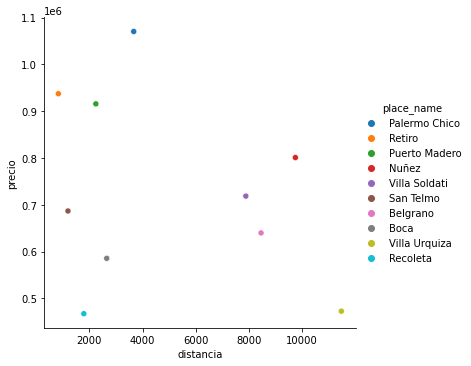

In [51]:
#Grafico relacion distancia precio top 10 precios
sns.relplot(x = 'distancia', y = 'precio', hue='place_name', data = data_rank_precio)

plt.show()

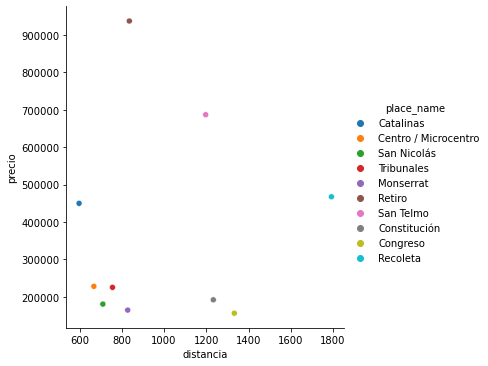

In [54]:
#Grafico relacion distancia precio top 10 distancia
sns.relplot(x = 'distancia', y = 'precio', hue='place_name', data = data_rank_distancia)

plt.show()


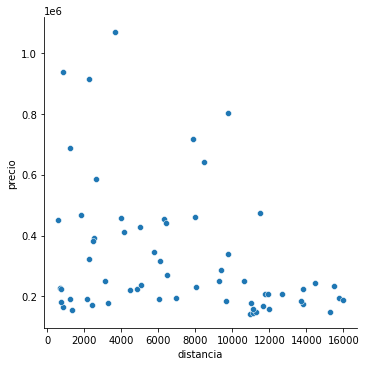

In [56]:
#Grafico relacion distancia precio todos.

sns.relplot(x = 'distancia', y = 'precio', data = geo_prop_group)

plt.show()

